# Data wrangling with Pandas

In [4]:
#import the libraries to be used

import pandas as pd #for wrangling
import numpy as np  # for numerical analysis and manipulations
import os   #for directory
import matplotlib.pyplot as plt  #visualization
import seaborn as sns    #heatmaps


In [12]:
#loading our dataset


print(os.getcwd()) #checking the directory in which we are working

df = pd.read_csv('FIFA 2018 Statistics.csv') #reading the data

df.head()


C:\Users\pc\Documents\Personal Projects\AESOPS_Python_Class_October_2023\Sessoin5


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [7]:
#use this to check the exact files within your current working folder
os.listdir()

['.ipynb_checkpoints',
 'Data Wrangling with Pandas.ipynb',
 'FIFA 2018 Statistics.csv']

# Can we predict the outcome of a match based on team statistics?

In [13]:
df.columns.unique()

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [21]:
# approach 1 for creating Win column
df['Win'] = (df['Man of the Match'] == 'Yes').astype(int)
df.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Win
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN,1
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,No,NaN,Group Stage,No,0,NaN,NaN,0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,0,No,NaN,Group Stage,No,0,NaN,NaN,0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN,1
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,0,No,NaN,Group Stage,No,0,1.0,90.0,0


In [23]:
#Approach 2
#creating a binary outcome column "win" (1 if the team actually won the match, and zero otherwise)

def win(row):
    if row['Man of the Match'] == "Yes":
        return 1
    else:
        return 0
df["win1"] = df.apply(win, axis =1)
df.head()


,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,Win,win1
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,Yes,12.0,Group Stage,No,0,NaN,NaN,1,1
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,No,NaN,Group Stage,No,0,NaN,NaN,0,0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,0,No,NaN,Group Stage,No,0,NaN,NaN,0,0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,Yes,89.0,Group Stage,No,0,NaN,NaN,1,1
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,0,No,NaN,Group Stage,No,0,1.0,90.0,0,0


# Feature selection

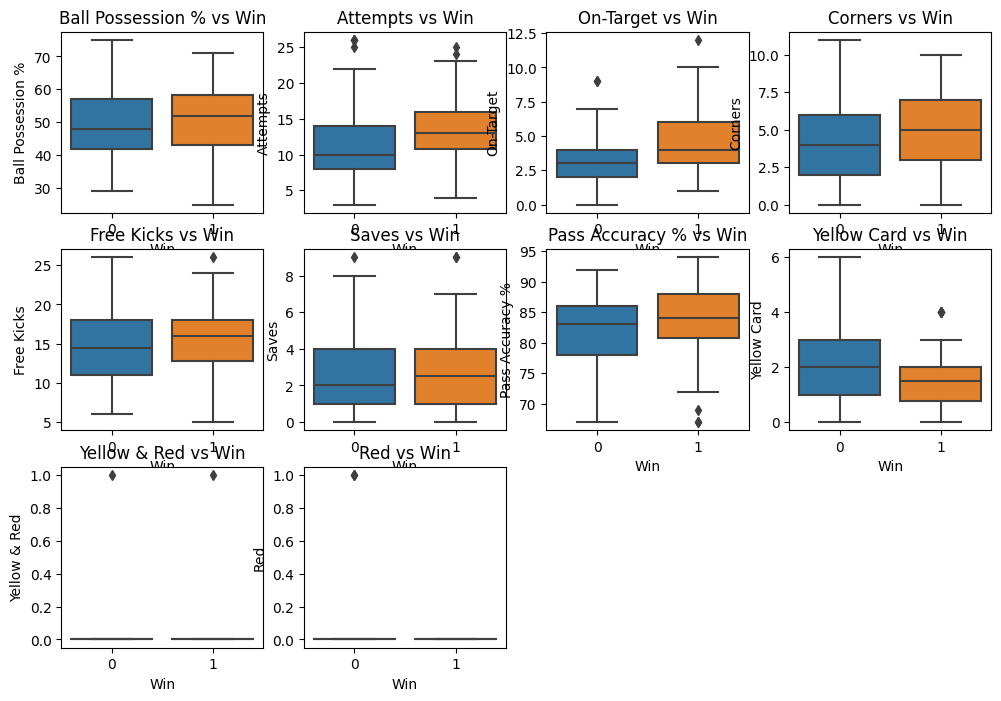

In [37]:
features = ['Ball Possession %','Attempts', 'On-Target','Corners',
       'Free Kicks', 'Saves', 'Pass Accuracy %','Yellow Card',
       'Yellow & Red', 'Red']


#visualize the relationship between features and our match outcome variable


plt.figure(figsize = (12,8))

for i, feature in enumerate(features,1):
    plt.subplot(3,4,i)
    sns.boxplot(x = 'Win', y = feature, data = df)
    plt.title(f'{feature} vs Win')

# Factors influencing the number of goals scored

Text(0.5, 1.0, ' Correlation Matrix')

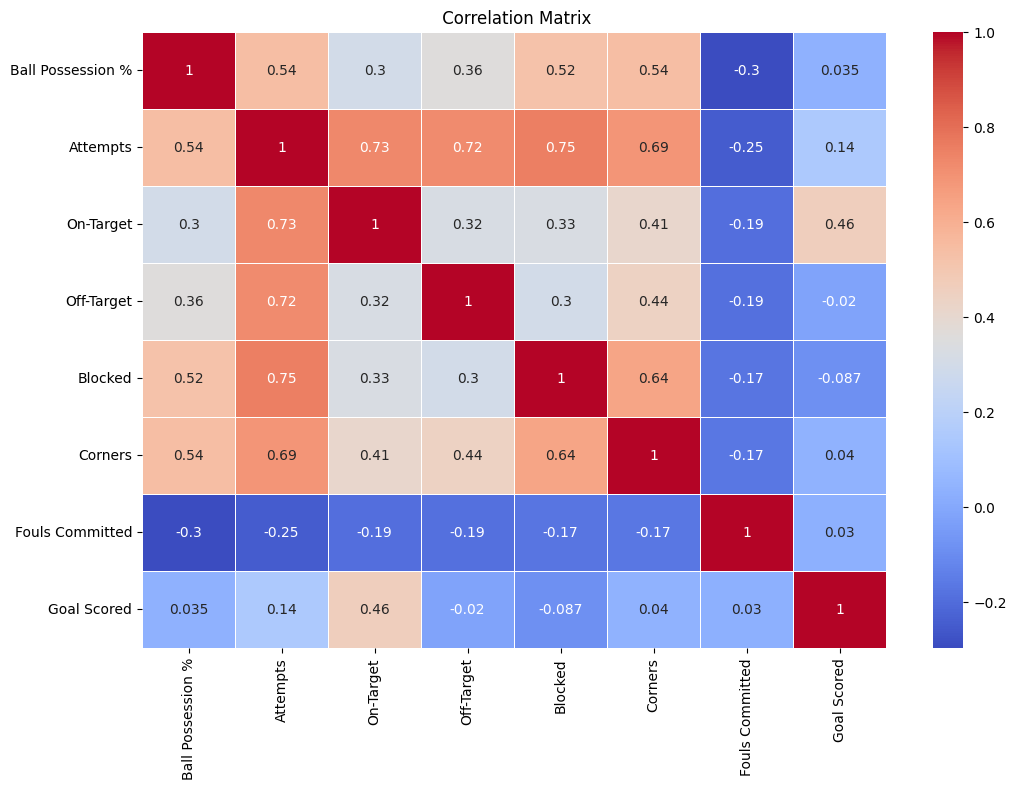

In [29]:
features_goals = ['Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Fouls Committed']

corr_matrix = df[features_goals + ['Goal Scored']].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths =0.5)
plt.title(' Correlation Matrix')



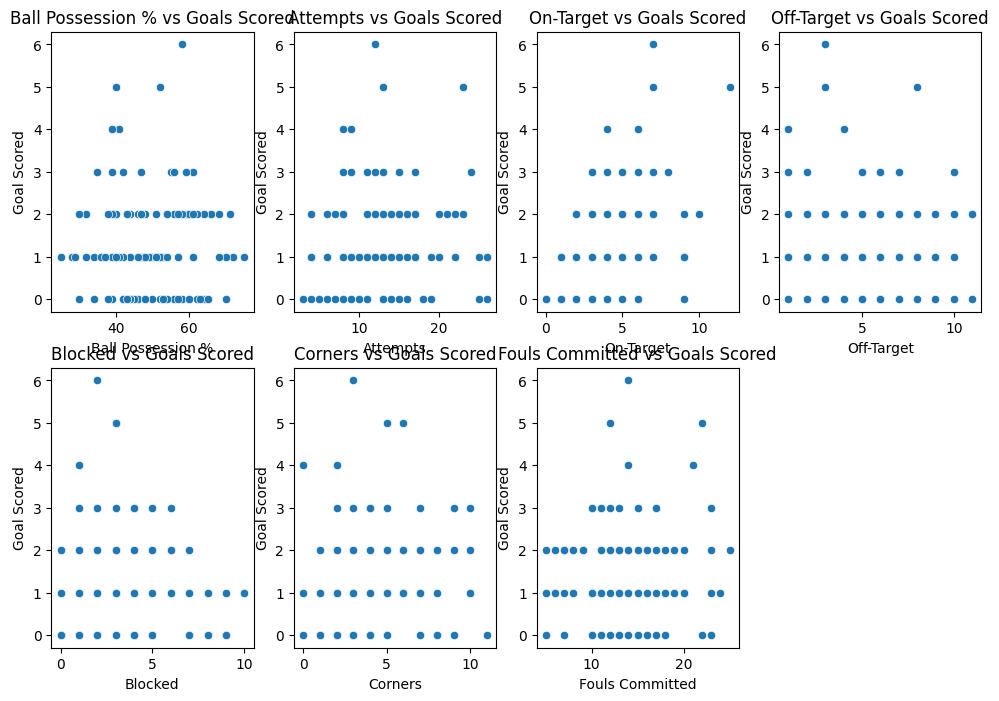

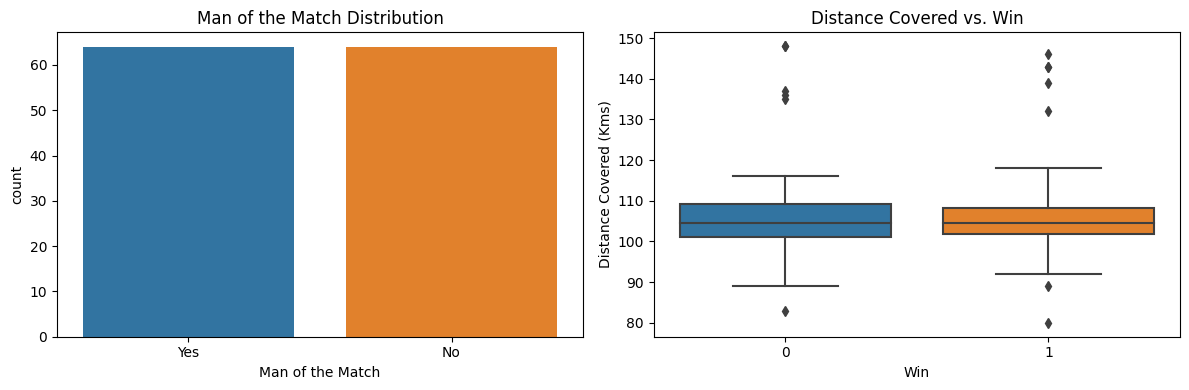

In [44]:

#visualizing the relationship between features and goals scored

plt.figure(figsize = (12,8))

for i, feature in enumerate(features_goals,1):
    plt.subplot(2,4,i)
    sns.scatterplot(x = feature, y = 'Goal Scored', data =df)
    plt.title(f'{feature} vs Goals Scored')

# Additional EDA
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='Man of the Match', data=df)
plt.title('Man of the Match Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='Win', y='Distance Covered (Kms)', data=df)
plt.title('Distance Covered vs. Win')


# Display all plots
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor

Mean Squared Error: 1.3610384615384616


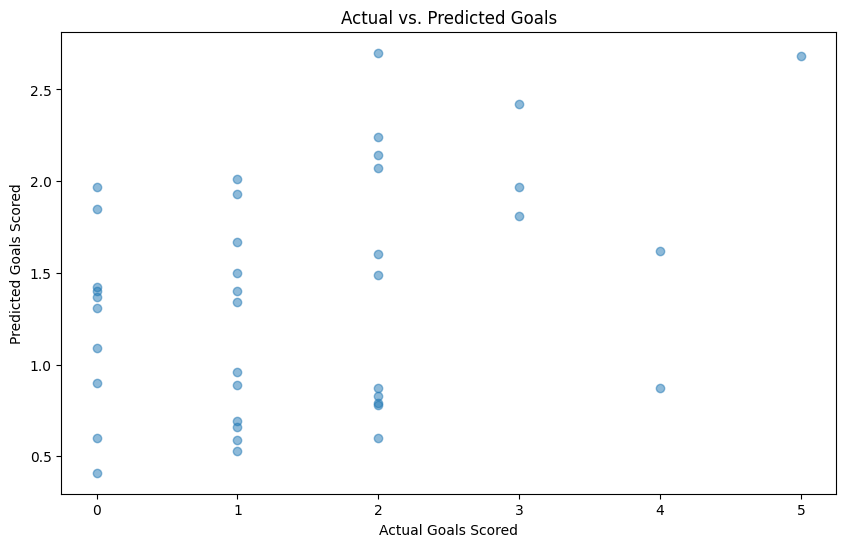

In [47]:
#sample modelling
X_goals = df[features_goals]
y_goals = df['Goal Scored']

# Split the data into training and testing sets
X_train_goals, X_test_goals, y_train_goals, y_test_goals = train_test_split(X_goals, y_goals, test_size=0.3, random_state=42)

# Build a random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_goals, y_train_goals)

# Evaluate the model
y_pred_goals = rf_model.predict(X_test_goals)
mse = np.mean((y_pred_goals - y_test_goals) ** 2)
print(f"Mean Squared Error: {mse}")

# Visualize the actual vs. predicted goals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_goals, y_pred_goals, alpha=0.5)
plt.title("Actual vs. Predicted Goals")
plt.xlabel("Actual Goals Scored")
plt.ylabel("Predicted Goals Scored")
plt.show()